In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

specific_string = ""

In [2]:
PREC = 'fp64'

## 2D for intercept

In [3]:
import timeit
reps = 1000
dim_arr = np.arange(2,200,dtype=int)
pts_arr = np.arange(1,300,dtype=int)
store = np.zeros((len(dim_arr),len(pts_arr)))

for i in range(len(dim_arr)):
    for j in range(len(pts_arr)):
        setup = specific_string + f"""
import numpy as np
import parament
run = parament.Parament(precision='{PREC}')
dim = {dim_arr[i]}
ham1 = np.eye(dim)/dim
ham2 = np.eye(dim)/dim
run.setHamiltonian(ham1,ham1)
"""
        snip = f"""
out = run.equiprop(np.zeros({pts_arr[j]}),0.001)
"""
        result = timeit.timeit(snip,setup=setup,number=reps)
        result = result/reps
        store[i,j] = result
        #print(j)
    print("-----------------")
    print(i)
    print("-----------------")
    if i > 0:
        reps = int(np.ceil((store[i-1,-1]/store[i,-1]) * reps))
        if reps < 5:
            reps = 5
        if reps > 1000:
            reps = 1000
        print("new reps", reps)
        np.save(PREC + '-runtime-2d-intercept',[dim_arr,pts_arr,store])
        
    #print(result)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/qutip/__init__.py:93: UserWarning: Old version of Cython detected: needed 0.29.20, got 0.29.15.
  .format(_cy_require, _Cython.__version__)


-----------------
0
-----------------
-----------------
1
-----------------
new reps 1000


/home/ubuntu/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


-----------------
2
-----------------
new reps 1000
-----------------
3
-----------------
new reps 988
-----------------
4
-----------------
new reps 990
-----------------
5
-----------------
new reps 985
-----------------
6
-----------------
new reps 1000
-----------------
7
-----------------
new reps 874
-----------------
8
-----------------
new reps 969
-----------------
9
-----------------
new reps 974
-----------------
10
-----------------
new reps 982
-----------------
11
-----------------
new reps 984
-----------------
12
-----------------
new reps 985
-----------------
13
-----------------
new reps 984
-----------------
14
-----------------
new reps 1000
-----------------
15
-----------------
new reps 893
-----------------
16
-----------------
new reps 886
-----------------
17
-----------------
new reps 885
-----------------
18
-----------------
new reps 890
-----------------
19
-----------------
new reps 857
-----------------
20
-----------------
new reps 848
-----------------

-----------------
160
-----------------
new reps 44
-----------------
161
-----------------
new reps 44
-----------------
162
-----------------
new reps 45
-----------------
163
-----------------
new reps 46
-----------------
164
-----------------
new reps 47
-----------------
165
-----------------
new reps 46
-----------------
166
-----------------
new reps 47
-----------------
167
-----------------
new reps 46
-----------------
168
-----------------
new reps 47
-----------------
169
-----------------
new reps 47
-----------------
170
-----------------
new reps 48
-----------------
171
-----------------
new reps 48
-----------------
172
-----------------
new reps 49
-----------------
173
-----------------
new reps 49
-----------------
174
-----------------
new reps 50
-----------------
175
-----------------
new reps 48
-----------------
176
-----------------
new reps 49
-----------------
177
-----------------
new reps 49
-----------------
178
-----------------
new reps 50
------------

In [4]:
np.save(PREC + '-runtime-2d-intercept',[dim_arr,pts_arr,store])

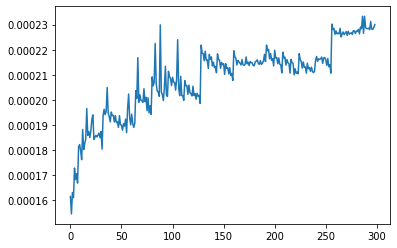

In [5]:
plt.plot(store[0,:])
#plt.ylim([0,0.0005])
#plt.xlim([0,50])

## Run time vs matrix size @ 80k

In [8]:
store = []

In [10]:
import timeit
store_i = []
store = []
reps = 1000
for i in (range(2,100)):
    setup = specific_string + f"""
import numpy as np
import parament
run = parament.Parament(precision='{PREC}')
dim = {i}
ham1 = np.eye(dim)/dim
ham2 = np.eye(dim)/dim
run.setHamiltonian(ham1,ham1)
"""
    snip = f"""
out = run.equiprop(np.zeros(40000),0.0001)
"""
    result = timeit.timeit(snip,setup=setup,number=reps)
    result = result/reps
    store_i.append(i)
    store.append(result)
    print(i)
    if len(store)>2:
        reps = int(np.ceil((store[-2]/store[-1])*reps))
        if reps < 5:
            reps = 5
        print("new reps", reps)
    #print(result)
    

2
3
4
new reps 961
5
new reps 937
6
new reps 910
7
new reps 878
8
new reps 889
9
new reps 602
10
new reps 582
11
new reps 559
12
new reps 542
13
new reps 517
14
new reps 503
15
new reps 485
16
new reps 510
17
new reps 394
18
new reps 384
19
new reps 367
20
new reps 361
21
new reps 339
22
new reps 322
23
new reps 306
24
new reps 306
25
new reps 265
26
new reps 256
27
new reps 243
28
new reps 237


MemoryError: Error code 20: Memory allocation on the device failed.

In [ ]:
np.savetxt(PREC + '-runtime-size.txt',np.transpose([store_i,store]))

In [ ]:
plt.plot(store_i,store)

## Run-time vs matrix-size @ 1

In [11]:
import timeit
reps = 100000
store_i = []
store = []
for i in (range(2,200)):
    setup = specific_string + f"""
import numpy as np
import parament
run = parament.Parament(precision='{PREC}')
dim = {i}
ham1 = np.eye(dim)/dim
ham2 = np.eye(dim)/dim
run.setHamiltonian(ham1,ham1)
"""
    snip = f"""
out = run.equiprop(np.zeros(1),0.001)
"""
    reps = int(np.ceil(reps/i))
    result = timeit.timeit(snip,setup=setup,number=reps)
    result = result/reps
    store_i.append(i)
    store.append(result)
    print(i)
    #print(result)
    

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [12]:
np.savetxt(PREC + '-runtime-size-one.txt',np.transpose([store_i,store]))

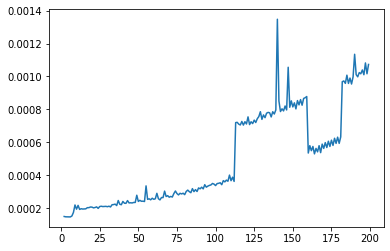

In [13]:
plt.plot(store_i,store)

## Run-time vs time-steps @ 12x12

In [14]:
import timeit
reps = 1000
store_i = []
store = []
for i in np.logspace(1,6,101,dtype=int):
    setup = specific_string + f"""
import numpy as np
import parament
run = parament.Parament(precision='{PREC}')
dim = 12
ham1 = np.eye(dim)/dim
ham2 = np.eye(dim)/dim
run.setHamiltonian(ham1,ham1)
"""
    snip = f"""
out = run.equiprop(np.zeros({i}),0.001)
"""
    result = timeit.timeit(snip,setup=setup,number=reps)
    result = result/reps
    store_i.append(i)
    store.append(result)
    print(i)
    #print(result)
    

10
11
12
14
15
17
19
22
25
28
31
35
39
44
50
56
63
70
79
89
100
112
125
141
158
177
199
223
251
281
316
354
398
446
501
562
630
707
794
891
1000
1122
1258
1412
1584
1778
1995
2238
2511
2818
3162
3548
3981
4466
5011
5623
6309
7079
7943
8912
10000
11220
12589
14125
15848
17782
19952
22387
25118
28183
31622
35481
39810
44668
50118
56234
63095
70794


MemoryError: Error code 20: Memory allocation on the device failed.

In [ ]:
np.savetxt(PREC + '-runtime-timesteps.txt',np.transpose([store_i,store]))

In [ ]:
plt.plot(store_i,store)

## Run-time vs matrix norm

In [ ]:
import timeit
reps = 70
store_i = []
store = []
for i in np.linspace(1e-4,50,100):
    setup = specific_string + f"""
import numpy as np
import parament
run = parament.Parament(precision='{PREC}')
dim = 12
ham1 = np.eye(dim)/dim
ham2 = np.eye(dim)/dim
run.setHamiltonian(ham1,ham1)
"""
    snip = f"""
out = run.equiprop(np.zeros(80000),{i})
"""
    result = timeit.timeit(snip,setup=setup,number=reps)
    result = result/reps
    store_i.append(i)
    store.append(result)
    print(i)
    #print(result)

In [ ]:
np.savetxt(PREC + '-runtime-norm.txt',np.transpose([store_i,store]))

In [ ]:
plt.plot(store_i,store)